<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/principal-component-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [3]:
library(pls)
library(tidyverse)
library(ggplot2)

setwd("/Users/letian/Desktop/huang_DSPN_S25/Homework")
dat <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame. 

In [13]:
head(dat)
d1 <- dat %>%
    select(Flanker_Unadj, ends_with("_Vol"))

d1 <- d1 %>%
    na.omit() %>%
    select(where(~ any(. != 0)))
head(d1)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,...,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,...,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,...,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,...,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,...,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,...,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,...,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,...,80,1613,0,1269,325,800,409,569,522,813
3,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,...,70,1007,0,1155,195,1029,526,578,576,649
4,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,...,88,1303,0,1279,302,972,589,528,471,858
5,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,...,81,909,0,1154,296,1065,618,838,729,1072
6,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,...,75,1215,3,377,235,1057,591,538,430,849
7,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,...,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [ ]:
cor(select(d1, starts_with("FS_")))
fs_cor <- as.matrix(cor(select(d1, starts_with("FS_"))))

,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,...,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
FS_IntraCranial_Vol,1.00000000,0.89775779,0.84001739,0.8439151,0.84527801,0.78851398,0.8751297,0.88515809,0.83110860,0.82780629,...,0.15363321,0.428612089,0.087584249,0.222582581,0.33097622,0.34486799,0.18960892,0.197341425,0.284599652,0.40182119
FS_BrainSeg_Vol,0.89775779,1.00000000,0.94481588,0.9482717,0.95026178,0.86899391,0.9664839,0.99584206,0.95025059,0.94827234,...,0.20678367,0.412581030,0.049790923,0.323144337,0.35006717,0.37677373,0.27243466,0.270768619,0.353484192,0.43087227
FS_LCort_GM_Vol,0.84001739,0.94481588,1.00000000,0.9844592,0.99601958,0.78978633,0.9821287,0.94856174,0.82823562,0.82204438,...,0.17001517,0.351647503,0.027475287,0.327222174,0.27354855,0.25151569,0.19618089,0.208943426,0.257297934,0.31406264
FS_RCort_GM_Vol,0.84391512,0.94827175,0.98445925,1.0000000,0.99619391,0.79257235,0.9830322,0.95186738,0.83308464,0.83075164,...,0.17595431,0.344117704,0.034303100,0.339033622,0.28341844,0.24448681,0.19182668,0.211885362,0.259001604,0.30540697
FS_TotCort_GM_Vol,0.84527801,0.95026178,0.99601958,0.9961939,1.00000000,0.79428656,0.9864250,0.95394600,0.83393307,0.82967591,...,0.17369412,0.349199524,0.031048540,0.334495942,0.27962765,0.24893064,0.19473767,0.211253307,0.259167897,0.31089656
FS_SubCort_GM_Vol,0.78851398,0.86899391,0.78978633,0.7925724,0.79428656,1.00000000,0.8407289,0.85912648,0.82483108,0.82505024,...,0.23081438,0.381043922,0.028549272,0.277929493,0.32808259,0.36367157,0.31694057,0.270171847,0.332095449,0.40412120
FS_Total_GM_Vol,0.87512975,0.96648393,0.98212867,0.9830322,0.98642496,0.84072890,1.0000000,0.95676918,0.84630850,0.84265274,...,0.19061124,0.365072324,0.036498799,0.327752825,0.30026585,0.26509338,0.21393596,0.227828080,0.273788710,0.32692300
FS_SupraTentorial_Vol,0.88515809,0.99584206,0.94856174,0.9518674,0.95394600,0.85912648,0.9567692,1.00000000,0.95657235,0.95448952,...,0.20303200,0.410095816,0.047016231,0.326916622,0.34304042,0.38403125,0.27388840,0.268821695,0.356887229,0.43655852
FS_L_WM_Vol,0.83110860,0.95025059,0.82823562,0.8330846,0.83393307,0.82483108,0.8463085,0.95657235,1.00000000,0.99720862,...,0.20733288,0.360053967,0.041169736,0.312125828,0.35983007,0.46628464,0.37067576,0.352852343,0.445780348,0.50126064
FS_R_WM_Vol,0.82780629,0.94827234,0.82204438,0.8307516,0.82967591,0.82505024,0.8426527,0.95448952,0.99720862,1.00000000,...,0.20560868,0.360960457,0.041746175,0.316231493,0.36438062,0.46048694,0.36768598,0.351758721,0.441418100,0.49765782


[1] "matrix" "array"

(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [24]:
library(reshape2)
fs_melted <- melt(fs_cor)
head(fs_melted)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

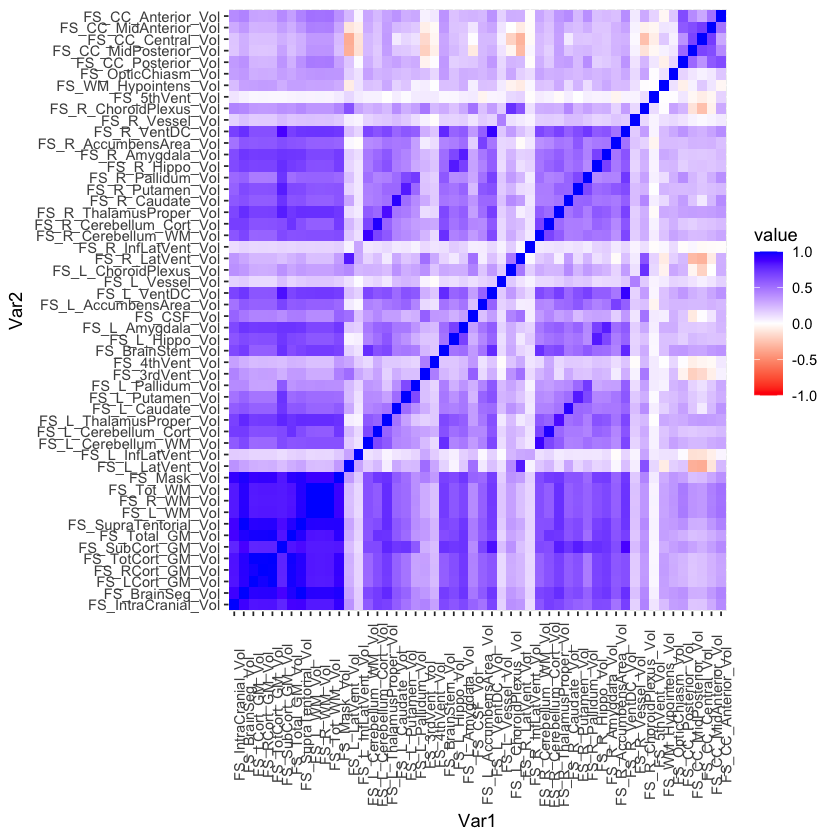

In [35]:
ggplot(data = fs_melted, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    theme(axis.text.x = element_text(angle = 90)) +
    scale_fill_gradient2(low = "red", high = "blue", limits = c(-1, 1))

What patterns do you see in the correlations?

> There are many variables that are positively correlated but not many variables that are negatively correlated. On the left bottom corner, there are a few variables highly positively correlated with each other.


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [42]:
fs_d.pca <- princomp(d1[, -1], cor = TRUE)
summary(fs_d.pca)

Importance of components:
                          Comp.1     Comp.2     Comp.3    Comp.4     Comp.5
Standard deviation     4.8304225 2.07734628 1.65701904 1.4542775 1.30623792
Proportion of Variance 0.4487112 0.08298784 0.05280216 0.0406716 0.03281264
Cumulative Proportion  0.4487112 0.53169903 0.58450118 0.6251728 0.65798543
                           Comp.6    Comp.7    Comp.8     Comp.9    Comp.10
Standard deviation     1.16284392 1.1399496 1.0653535 1.04639581 1.01824771
Proportion of Variance 0.02600396 0.0249901 0.0218265 0.02105662 0.01993901
Cumulative Proportion  0.68398939 0.7089795 0.7308060 0.75186261 0.77180161
                          Comp.11   Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     0.96724824 0.9260219 0.90433487 0.86368396 0.80338987
Proportion of Variance 0.01799171 0.0164907 0.01572734 0.01434519 0.01241222
Cumulative Proportion  0.78979333 0.8062840 0.82201137 0.83635656 0.84876878
                          Comp.16    Comp.17    Comp.18   

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

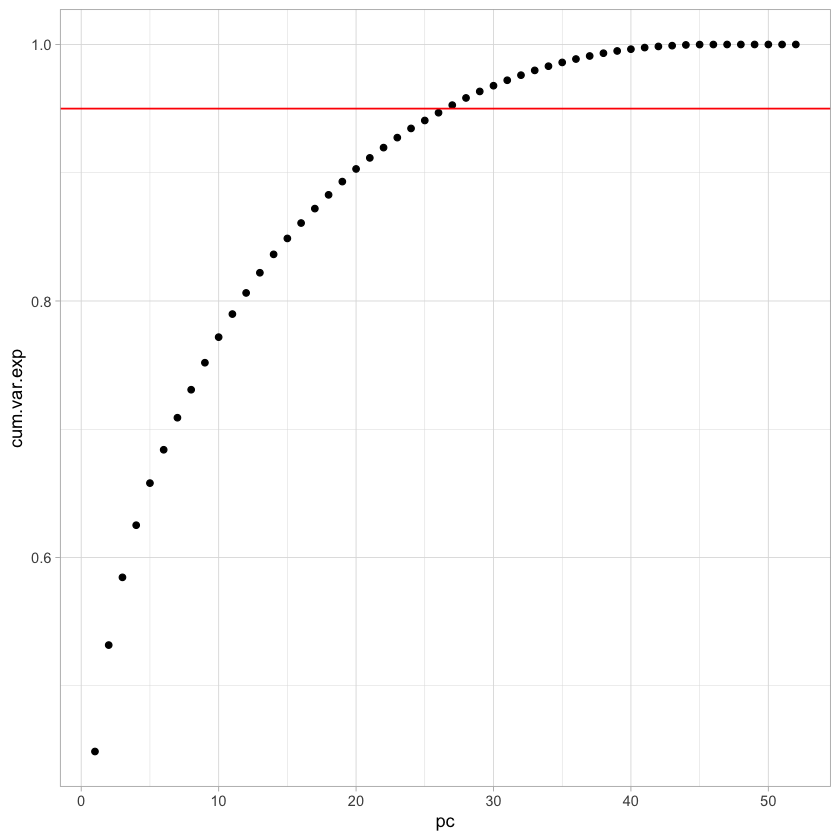

In [47]:
cum.var.exp <- cumsum(fs_d.pca$sdev^2/sum(fs_d.pca$sdev^2))
dat_plot <- data.frame(pc = 1:52, cum.var.exp)


ggplot(dat_plot, aes(x = pc,y = cum.var.exp)) + 
    geom_point() + 
    theme_light() +
    geom_hline(yintercept = .95, color = "red")

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function. 

In [48]:
num.pc <- min(which(cum.var.exp >= .95))
num.pc

[1] 27

What does this tell you about the underlying dimensionality of the brain volume measures? 

> The results suggest that only 27 variables are needed to explain at least 95% of the variance in the volume measures, suggesting that many vrain volume measures are highly correlated with each other and don't contribute to more variance.


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [49]:
set.seed(2)
pcr.fit = pcr(Flanker_Unadj ~ ., data = d1, scale = TRUE, validation ="CV")
summary(pcr.fit)

Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

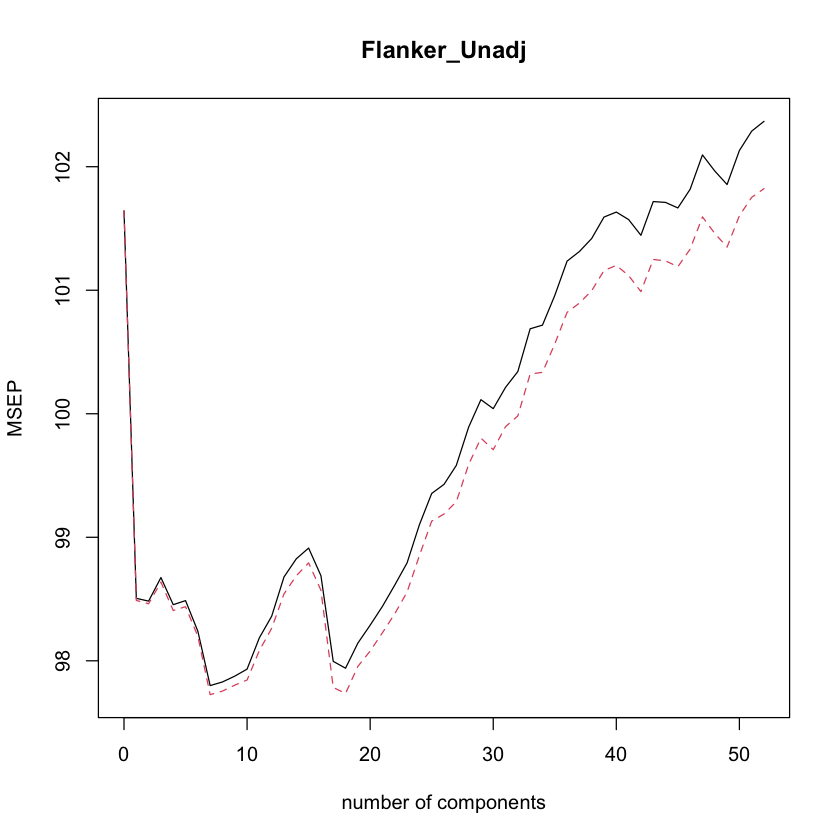

In [ ]:
validationplot(pcr.fit, val.type = "MSEP")

(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [84]:
dat_msep <- MSEP(pcr.fit, estimate = "CV")
dat_msep <- as.array(dat_msep)
dat_msep <- as.array(drop(dat_msep))
str(dat_msep)
dat_msep
min <- which.min(dat_msep$val[1,1,])
min

List of 5
 $ val       : num [1, 1, 1:53] 101.6 98.5 98.5 98.7 98.5 ...
  ..- attr(*, "dimnames")=List of 3
  .. ..$ estimate: chr "CV"
  .. ..$ response: chr "Flanker_Unadj"
  .. ..$ model   : chr [1:53] "(Intercept)" "1 comps" "2 comps" "3 comps" ...
 $ type      : chr "MSEP"
 $ comps     : num [1:53] 0 1 2 3 4 5 6 7 8 9 ...
 $ cumulative: logi TRUE
 $ call      : language MSEP.mvr(object = pcr.fit, estimate = "CV")
 - attr(*, "class")= chr "mvrVal"
 - attr(*, "dim")= int 5
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:5] "val" "type" "comps" "cumulative" ...


(Intercept)      1 comps      2 comps      3 comps      4 comps      5 comps  
     101.64        98.51        98.48        98.67        98.45        98.49  
    6 comps      7 comps      8 comps      9 comps     10 comps     11 comps  
      98.24        97.80        97.83        97.88        97.93        98.19  
   12 comps     13 comps     14 comps     15 comps     16 comps     17 comps  
      98.36        98.68        98.83        98.91        98.69        98.00  
   18 comps     19 comps     20 comps     21 comps     22 comps     23 comps  
      97.94        98.14        98.29        98.44        98.61        98.79  
   24 comps     25 comps     26 comps     27 comps     28 comps     29 comps  
      99.10        99.35        99.43        99.58        99.89       100.11  
   30 comps     31 comps     32 comps     33 comps     34 comps     35 comps  
     100.04       100.21       100.34       100.69       100.72       100.96  
   36 comps     37 comps     38 comps     39 comps  

7 comps 
      8

What what does this plot tell you about how many components best explain variance in Flanker task performance? 

> It suggests that 7 components best explain the variance in Flanker task performance.

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> The number of components that explain variance in X alone is larger than the number of components that explain performance in the Flanker task, this suggests that not all brain volume measures are related to the Flanker task performance.

**DUE:** 5pm EST, April 15, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*